In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from tlspuffin_analyzer import *
import matplotlib.pyplot as plt

In [20]:
pesto_path = "/local-homes/lhirschi/tlspuffin/experiments"

from IPython.display import display, Markdown

def display_readme(path):
    with open (path, "r") as file:
        display(Markdown(file.read()))

def plot_stats(path, experiment, specific=1):
    stats = load_json_slurpy("%s/%s/stats.json" % (path, experiment), 1)
    log = load_json_slurpy_log("%s/%s/tlspuffin-log.json" % (path, experiment))
    start_date = get_start_date(stats)
    start_date_log = log[0]["time"]
    
    display_readme("%s/%s/README.md" % (path, experiment))
        
    fig = plot_client_stats(start_date, start_date_log, stats, log, fewer=True)

    fig.set_size_inches(12, 14, forward=True)
    fig.tight_layout(pad=1)
    plt.show()

Reading...
Parsing...


# Experiment: test0
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2022-01-11T11:32:37.616167781+01:00
* Git Ref: e32e6bdf176b90f0c75f54b798ebf0ac1cb85e62
* Git Commit: Update README.md
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Je teste des trucs.


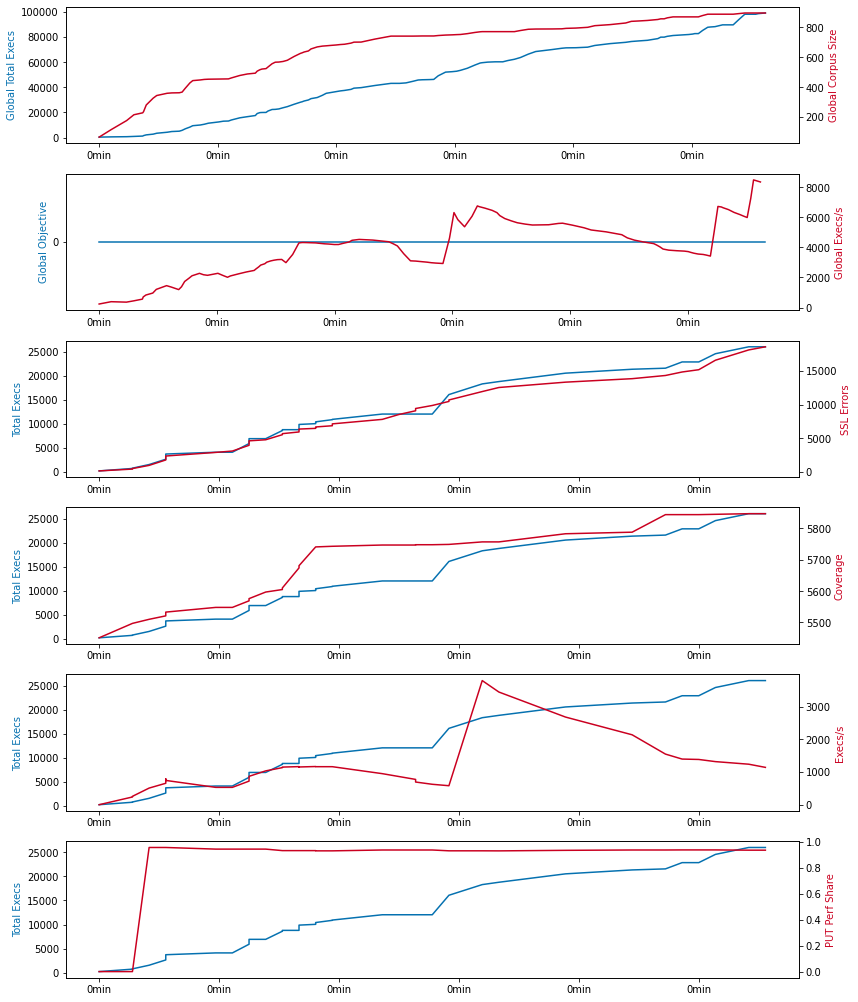

In [22]:
# No resusult after 50h; 1 Core
# This is intersting as it does not find the vulnerability
plot_stats(pesto_path, "2022-01-11-113237-test0-0")

# Experiment: 2021-06-28T17:18:22Z-e29788aec4ed9a6237194ecce45017133ae708b0
* OpenSSL: OpenSSL 1.1.1j  16 Feb 2021
* Date: 2021-06-28T17:18:22.325950607+00:00
* Git Ref: e29788aec4ed9a6237194ecce45017133ae708b0
* Git Commit: Fix ref
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

No Description, because this is a quick experiment.


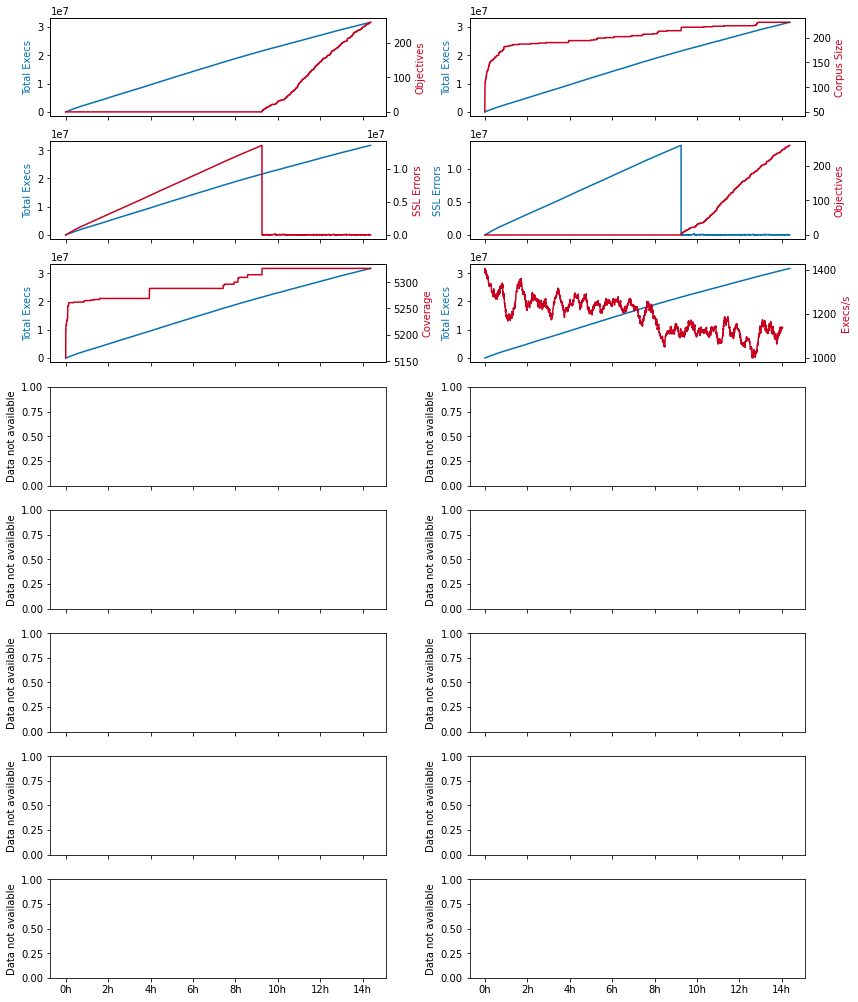

In [5]:
# Result, pesto, found after 6h; 1 Core
plot_stats(pesto_path, "2021-06-28T17:18:22Z-e29788aec4ed9a6237194ecce45017133ae708b0")

## Conclustion why it takes sometimes longer

In the last run the "Max Term size" is slightly larger, while the "Mean term size" is smaller. This could indicate that many randomly chosen bad decisions have a major impact on the behaviour afterwards. This is expectable and totally fine.

The solution to this is to add bounds to the term size.

# Experiment: 2021-07-05-140555-4e2491e0527ba1d3e470f1d73321aac966668a85-0
* OpenSSL: OpenSSL 1.0.1j 15 Oct 2014
* Date: 2021-07-05T14:05:55.411612217+02:00
* Git Ref: 4e2491e0527ba1d3e470f1d73321aac966668a85
* Git Commit: Update corpus
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

No Description, because this is a quick experiment.


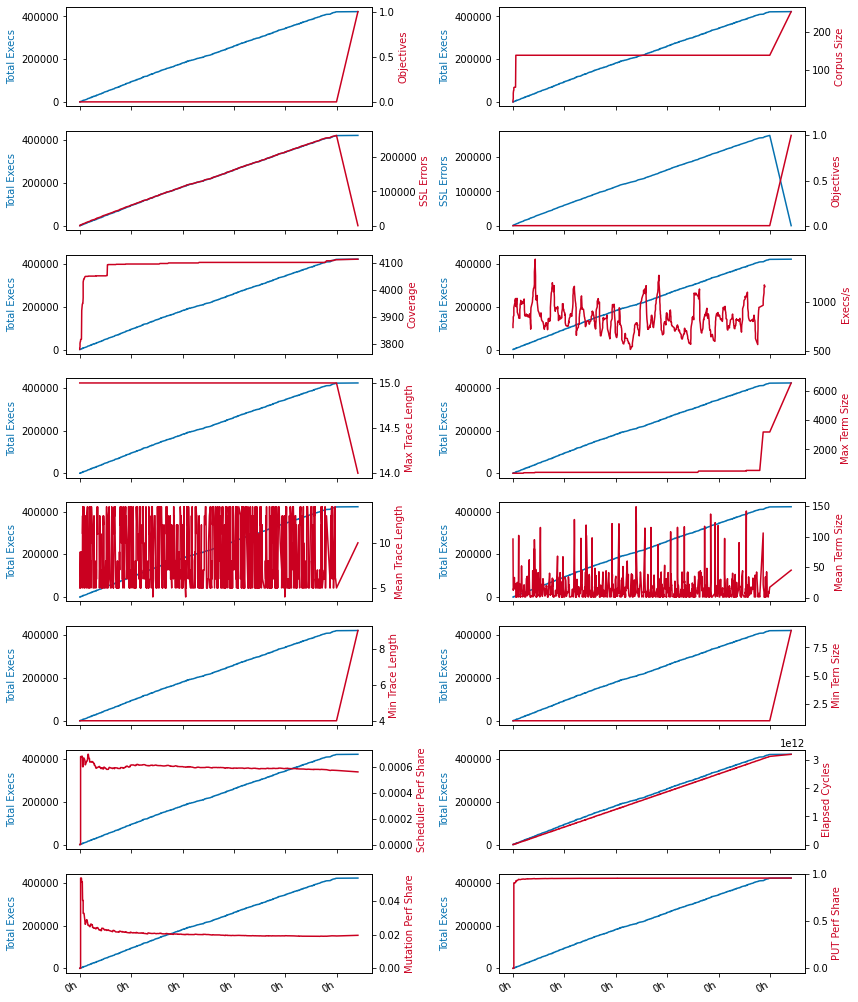

# Experiment: 2021-07-05-142547-4e2491e0527ba1d3e470f1d73321aac966668a85-0
* OpenSSL: OpenSSL 1.0.1j 15 Oct 2014
* Date: 2021-07-05T14:25:47.453619888+02:00
* Git Ref: 4e2491e0527ba1d3e470f1d73321aac966668a85
* Git Commit: Update corpus
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

No Description, because this is a quick experiment.


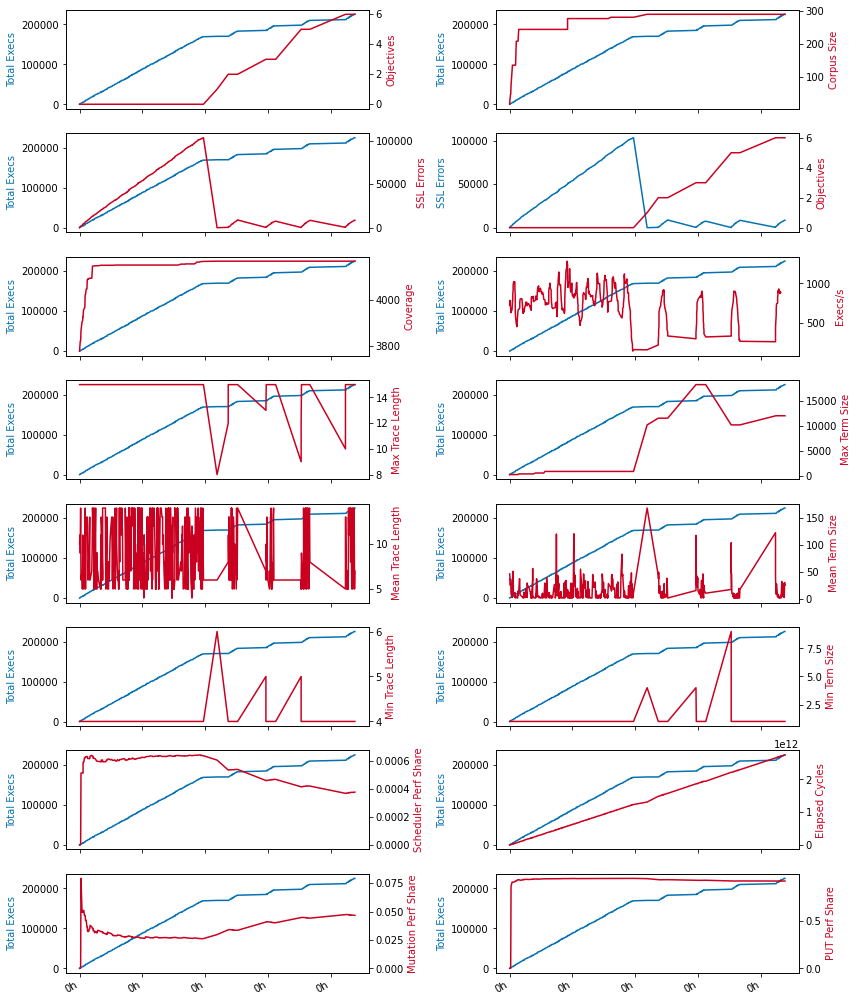

In [6]:
# These two runs produced crashes in the execution engine -> Rust crahes
# This was because the fuzzer generated very long trace with hundereds and tousands of tls extensions -> next run will limit term size
plot_stats(pesto_path, "2021-07-05-140555-4e2491e0527ba1d3e470f1d73321aac966668a85-0", specific=1)
plot_stats(pesto_path, "2021-07-05-142547-4e2491e0527ba1d3e470f1d73321aac966668a85-0", specific=1)

# Experiment: 2021-07-05-183833-6fcbd857499a5f7f16d3bdcb9a9f1e76375dac27-0
* OpenSSL: OpenSSL 1.0.1j 15 Oct 2014
* Date: 2021-07-05T18:38:33.787347739+02:00
* Git Ref: 6fcbd857499a5f7f16d3bdcb9a9f1e76375dac27
* Git Commit: Temporary fix: Make it easier for the fuzzer
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

No Description, because this is a quick experiment.


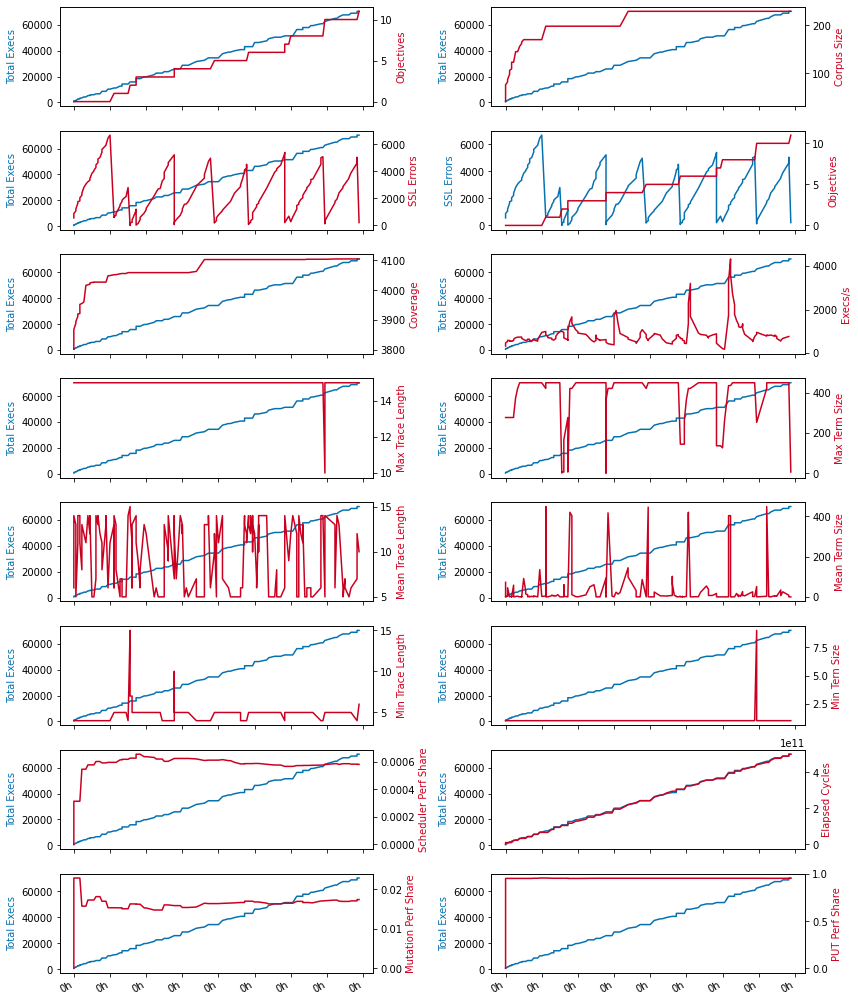

In [7]:
# First run with bounded term size, trying to find FREAK

plot_stats(pesto_path, "2021-07-05-183833-6fcbd857499a5f7f16d3bdcb9a9f1e76375dac27-0", specific=1)

In [9]:
# Run with Generativ mutator and a lot more extensions implemented
# Filtering takes too long -> disable
#plot_stats(pesto_path, "2021-07-19-180611-7306df9ef0ff1f033ef0c2fe984e893729c97291-0", specific=1)

In [11]:
# Very long run  fuzzing OpenSSL
# Filtering takes too long -> disable
#plot_stats(pesto_path, "2021-08-11-184522-f7587d6790a4ce655cb1e4d2bd776c0307f0f8ce-0", specific=1)

# Evaluation for thesis

# Experiment: thesis-openssl
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-08-31T14:05:20.148677249+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis


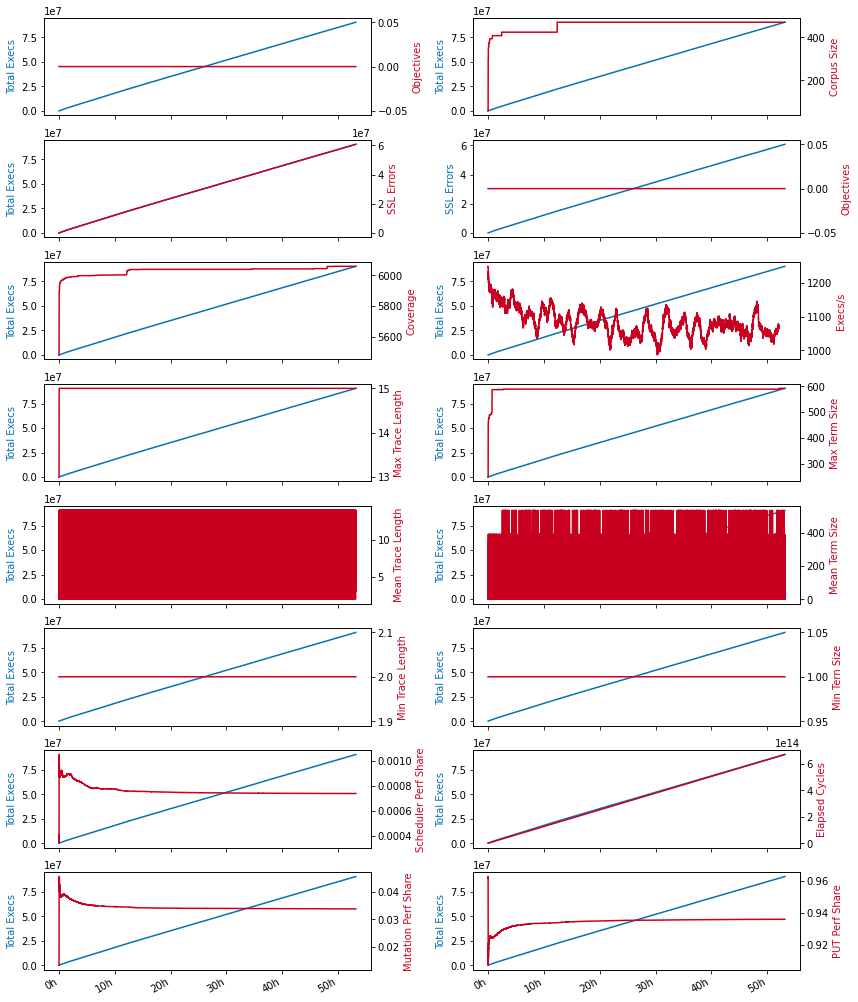

In [13]:
plot_stats(pesto_path, "2021-08-31-140520-thesis-openssl-0", specific=1)

# Experiment: thesis-openssl-lower-mutations
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-02T19:24:19.693705125+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis; iterations = 128; muts per iteration = 8


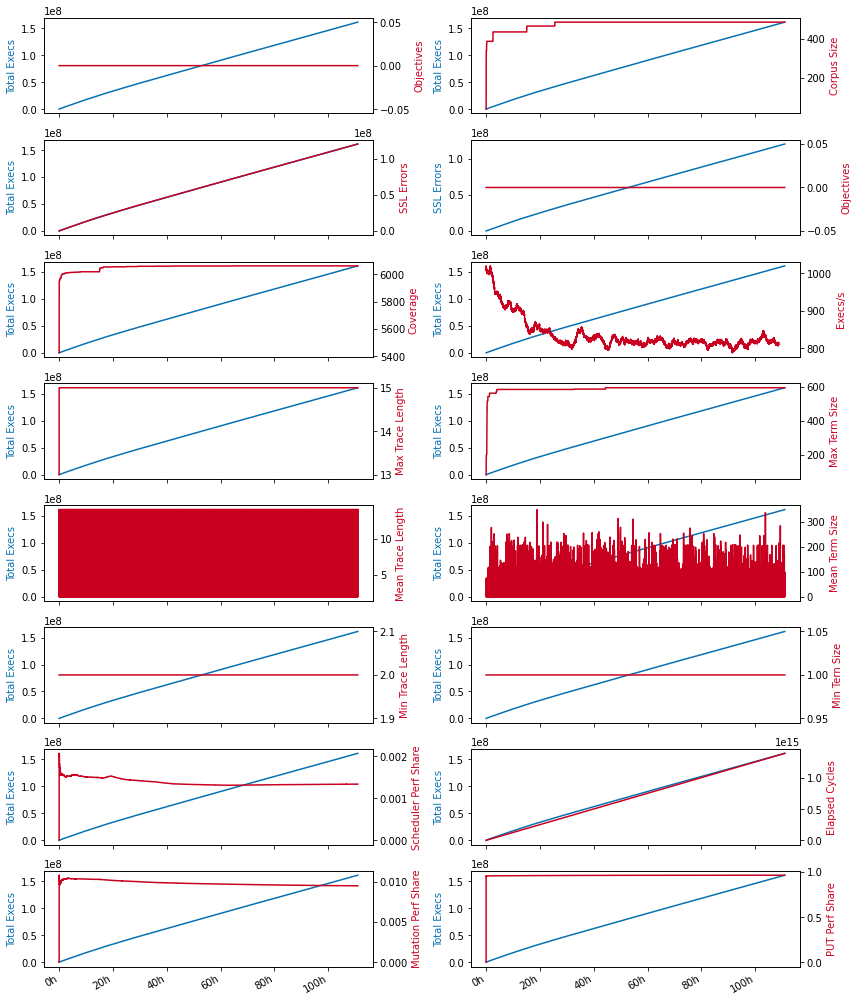

In [14]:
plot_stats(pesto_path, "2021-09-02-192419-thesis-openssl-lower-mutations-0", specific=1)

# Experiment: thesis-libressl-lower-mutations
* OpenSSL: LibreSSL 3.3.3
* Date: 2021-09-02T19:26:27.228592428+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis with LibreSSL enabled; iterations = 128; muts per iteration = 8


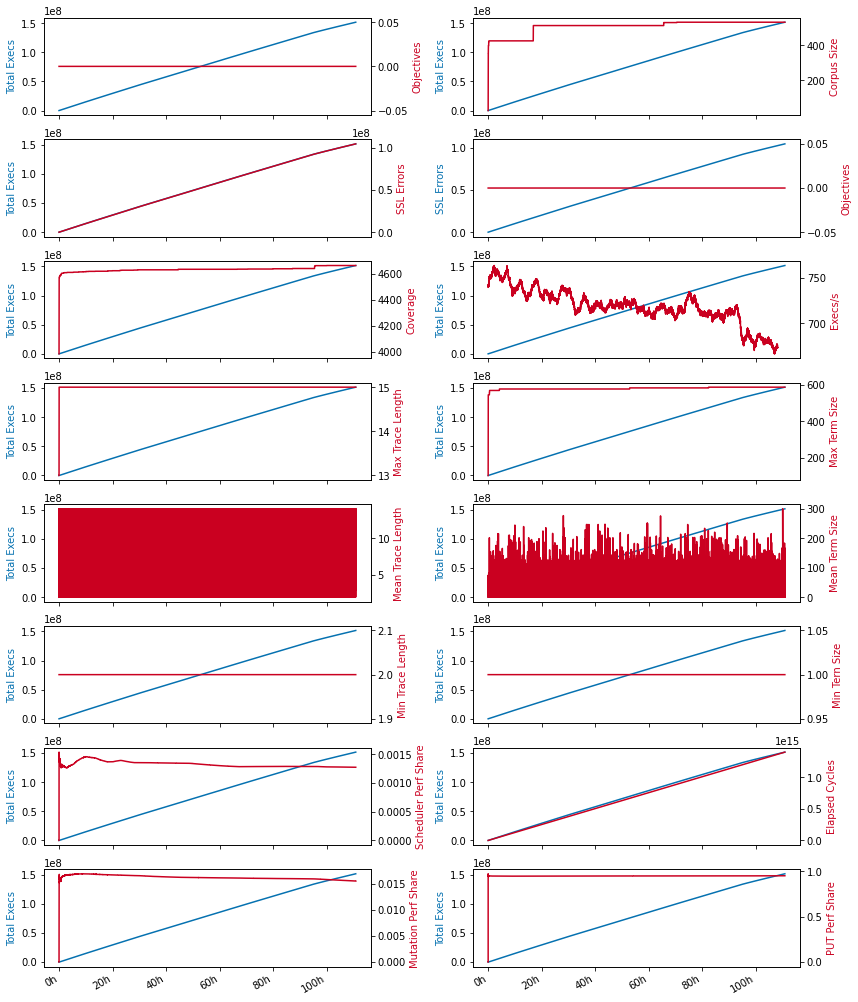

In [15]:
plot_stats(pesto_path, "2021-09-02-192627-thesis-libressl-lower-mutations-0", specific=1)

# Experiment: thesis-libressl
* OpenSSL: LibreSSL 3.3.3
* Date: 2021-08-30T19:50:54.481871812+02:00
* Git Ref: 058262f56bd86893c68fb171662d236a42d7d072
* Git Commit: Update corpus
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run for thesis with LibreSSL enabled; --no-default-features --features libressl,sancov_libafl,introspection


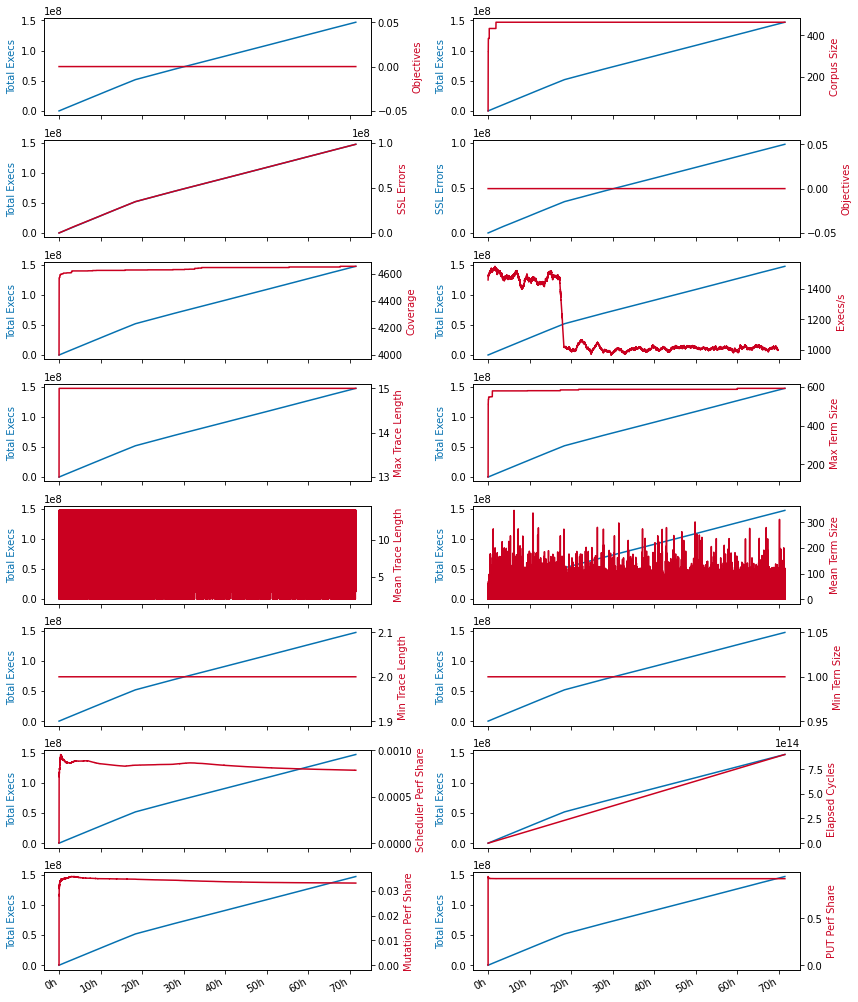

In [16]:
plot_stats(pesto_path, "2021-08-30-195054-thesis-libressl-0", specific=1)

# Experiment: thesis-openssl-sanitizer
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-13T11:00:48.373871027+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

With ASAN


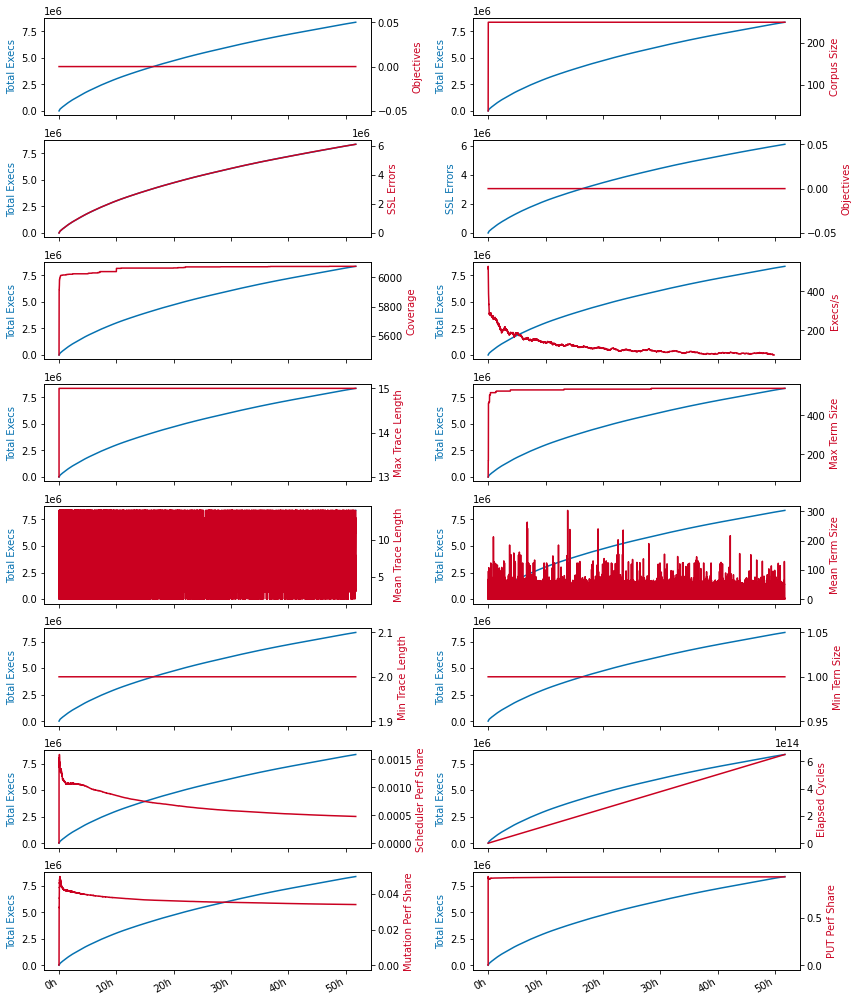

In [17]:
plot_stats(pesto_path, "2021-09-13-110048-thesis-openssl-sanitizer-0", specific=1)

# Experiment: thesis-openssl-no-minimzer
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-13T11:11:06.330605492+02:00
* Git Ref: b95f0feec66bd267199e805574876b1084a59b39
* Git Commit: Switch from core number to core definition
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Without minimizer (minimizes only trace length, not term size)


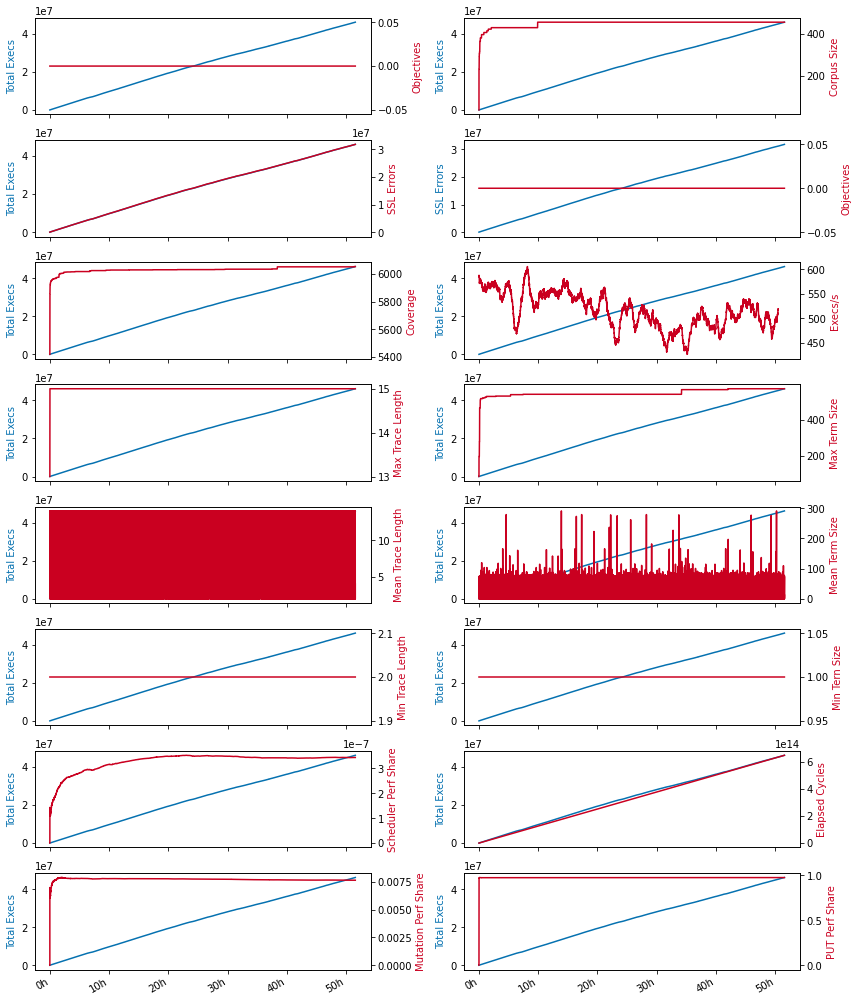

In [18]:
plot_stats(pesto_path, "2021-09-13-111106-thesis-openssl-no-minimzer-0", specific=1)

# Experiment: thesis-openssl101f
* OpenSSL: OpenSSL 1.0.1f 6 Jan 2014
* Date: 2021-09-17T12:58:27.320901414+02:00
* Git Ref: 831bb3fae157c344584b5d886a69c7ee49e04a92
* Git Commit: Remove hex output as it is verbose
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl101f with seeds: client_attacker12, seed_sucessful12


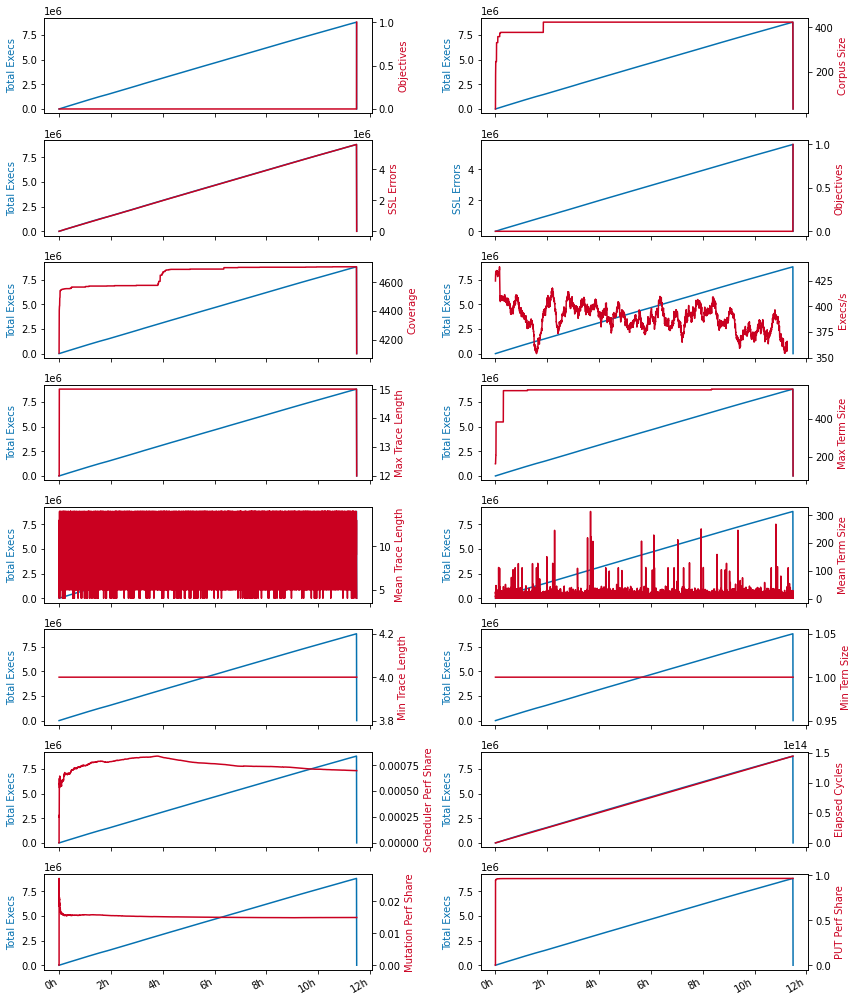

In [8]:
# Fuzzer crashed
plot_stats(pesto_path, "2021-09-17-125827-thesis-openssl101f-0", specific=1)

# Experiment: thesis-openssl102u
* OpenSSL: OpenSSL 1.0.2u  20 Dec 2019
* Date: 2021-09-17T13:57:24.209885513+02:00
* Git Ref: c5bc251bc4db55d689fcda38e26862f1b4f2230b
* Git Commit: Include openssl102u
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl102u with seeds: client_attacker12, seed_sucessful12


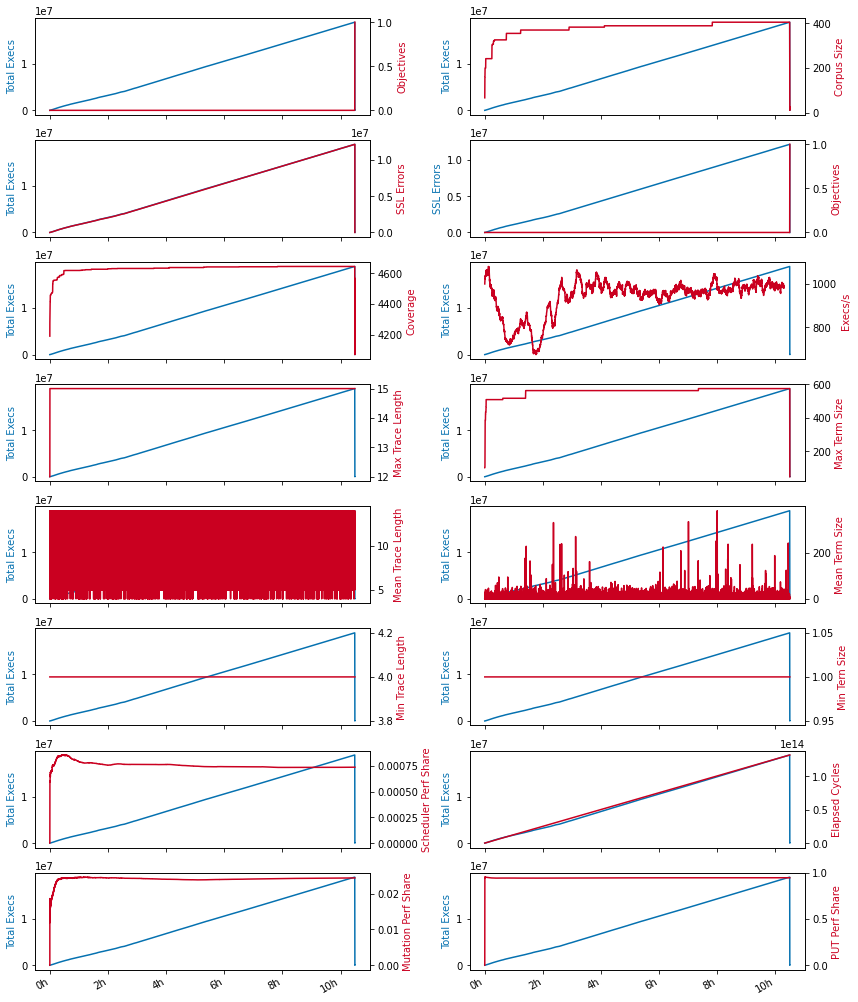

In [7]:
plot_stats(pesto_path, "2021-09-17-135724-thesis-openssl102u-0", specific=1)

# Experiment: thesis-openssl102u
* OpenSSL: OpenSSL 1.0.2u  20 Dec 2019
* Date: 2021-09-20T10:49:00.100618598+02:00
* Git Ref: c5bc251bc4db55d689fcda38e26862f1b4f2230b
* Git Commit: Include openssl102u
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl102u with seeds: client_attacker12, seed_sucessful12


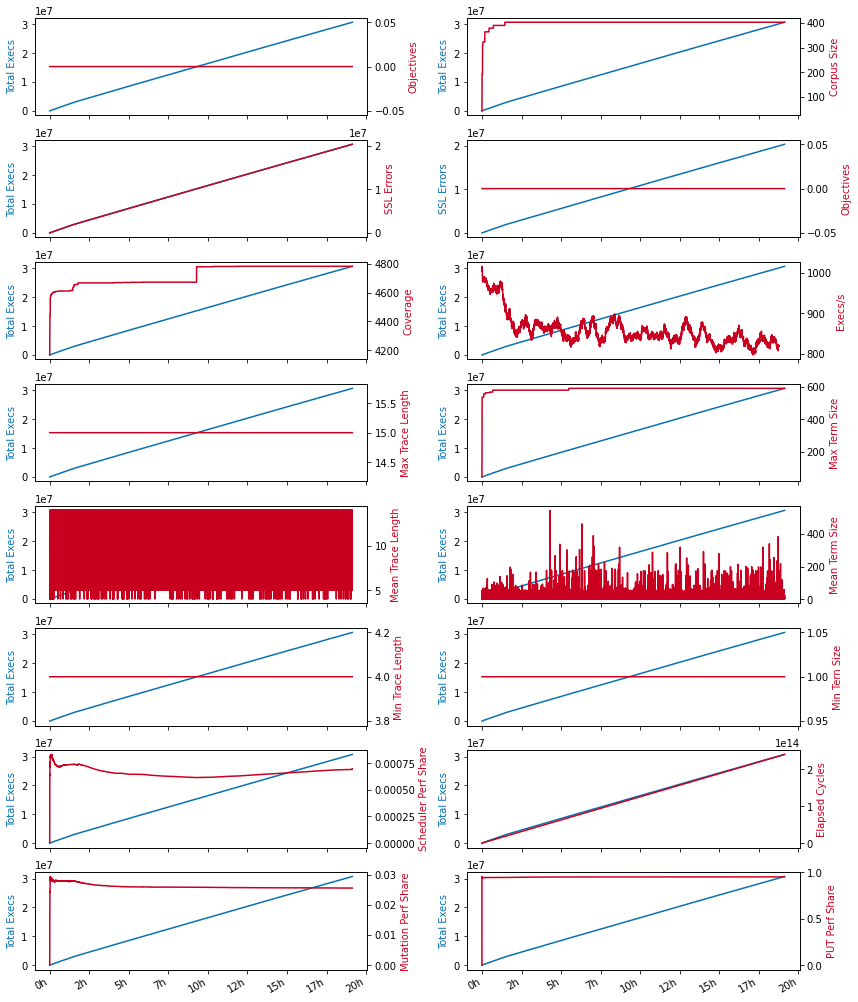

In [6]:
# OOM
plot_stats(pesto_path, "2021-09-20-104900-thesis-openssl102u-0", specific=1)

# Experiment: thesis-openssl102u-again
* OpenSSL: OpenSSL 1.1.1k  25 Mar 2021
* Date: 2021-09-30T20:14:10.458728010+02:00
* Git Ref: ed18213305d2f53da77bc63ca13a107ca10440fe
* Git Commit: try to handle errors during parsing
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Redo intial experiment


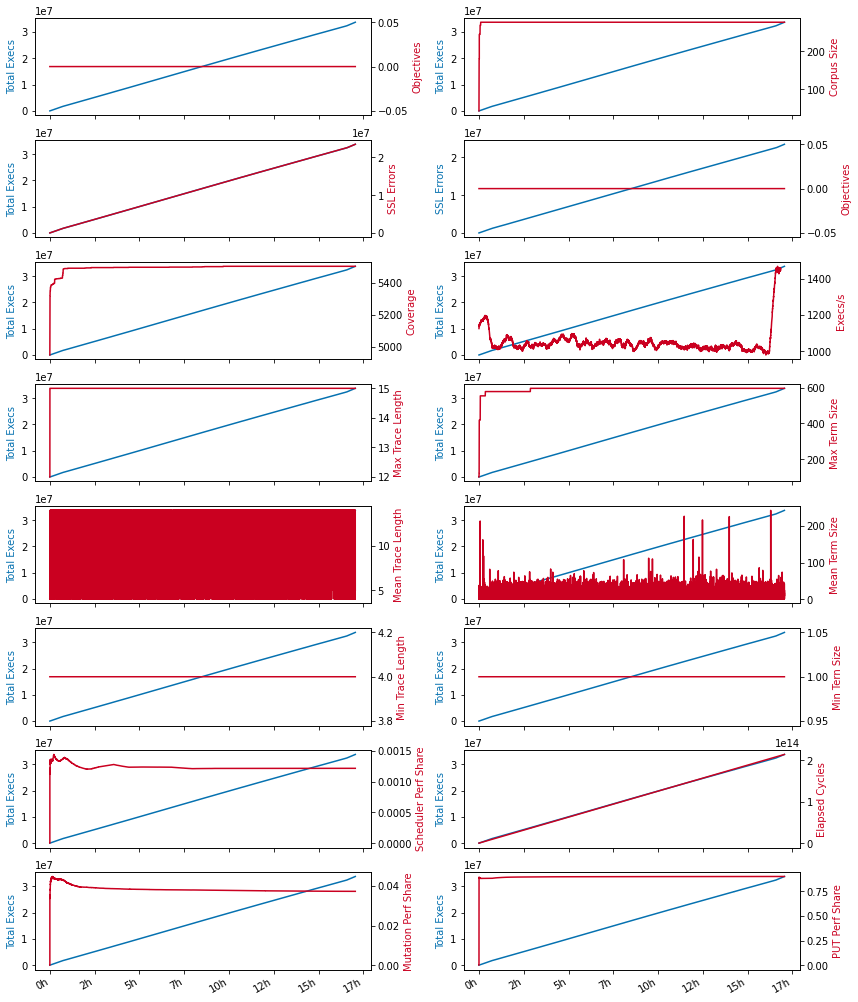

In [5]:
# Sanity check for area bug
plot_stats(pesto_path, "2021-09-30-201410-thesis-openssl102u-again-0", specific=1) # OpenSSl 111k

# Experiment: thesis-openssl102u
* OpenSSL: OpenSSL 1.0.2u  20 Dec 2019
* Date: 2021-09-30T20:04:34.725159885+02:00
* Git Ref: ed18213305d2f53da77bc63ca13a107ca10440fe
* Git Commit: try to handle errors during parsing
* Log: [tlspuffin-log.json](./tlspuffin-log.json)

Run with openssl102u with all seeds


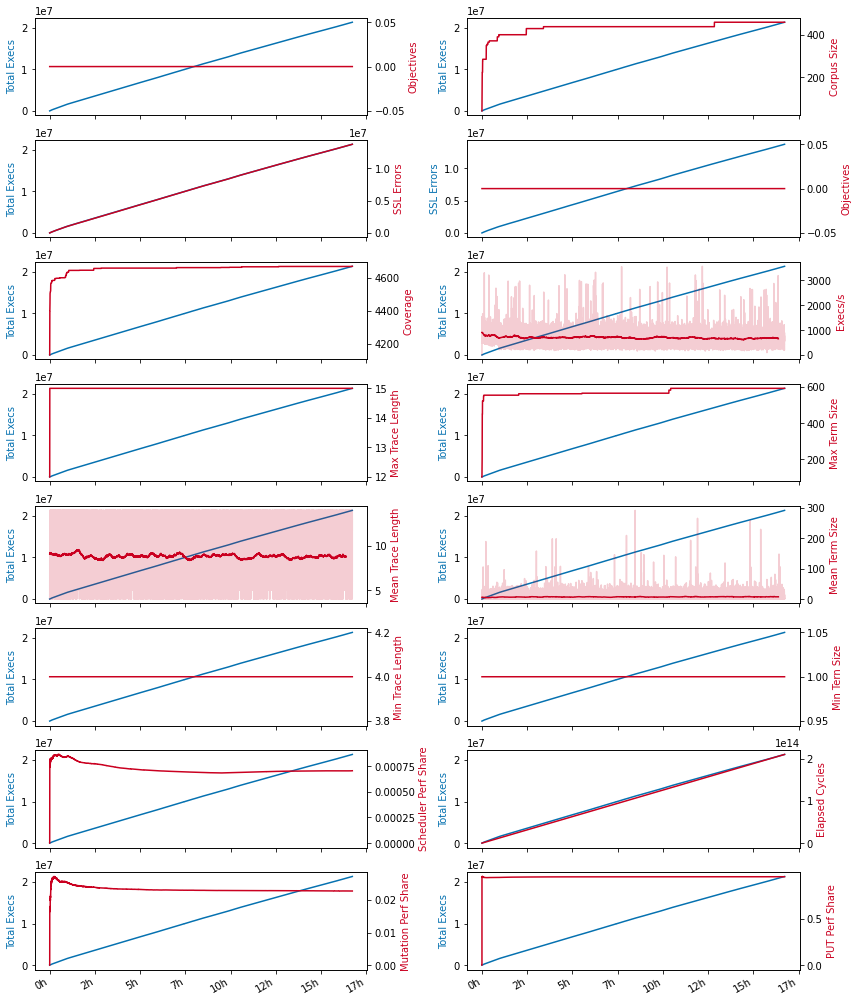

In [9]:
plot_stats(pesto_path, "2021-09-30-200434-thesis-openssl102u-0", specific=1) # OpenSSl 102